### What is $R^2$, $r^2$

$R^2$: percentage of variance explained: 1- sum((y_i hat -y_i)^2) / sum((y_i -y_mean)^2) \
$R^2$ equivalent definition: sum((y_i hat -y_mean)^2) / sum((y_i -y_mean)^2) \

yhat : predicted

The graphical intuition behind R2 is shown in Figure 2.2. Suppose you want to predict y. If you don’t
know x, then your best prediction is ¯y but the variability in this prediction is high. If you do know x, then
your prediction will be given by the regression fit. This prediction will be less variable provided there is
some relationship between x and y. R2 is one minus the ratio of the sum of squares for these two predictions.
Thus for perfect predictions the ratio will be zero and R2 will be one.

Watch out: for intercept=0, R^2 becomes invalid! 

### Gauss-Markov theorem: 
The Gauss-Markov theorem shows that the least squares estimate beta hat is a good choice, but if the errors
are correlated or have unequal variance, there will be better estimators. Even if the errors behave but are
non-normal then non-linear or biased estimates may work better in some sense. So this theorem does not
tell one to use least squares all the time, it just strongly suggests it unless there is some strong reason to do
otherwise.
Situations where estimators other than ordinary least squares should be considered are
1. When the errors are correlated or have unequal variance, generalized least squares should be used.
2. When the error distribution is long-tailed, then robust estimates might be used. Robust estimates are
typically not linear in y.
3. When the predictors are highly correlated (collinear), then biased estimators such as ridge regression
might be preferable.

#### Assumptions about the distributions of errors


### Testing which model is better - F-test (Faraway p.27)

RSS = $\sum (\hat y_i  -y_i)^2 $

We have big model $\Omega$ with $q$ parameters, and $\omega$ with $p$ parameters (number of parameters is the number of predictors plus one). Their degrees of freedom: $df_\omega = n-p$, $df_\Omega = n-q$. Watch out for alternate definitions where $df = obs - par - 1$ The same test applies when $\omega$ is not only subset of $\Omega$, but also subspace 

Both explain the same $n$ observations. To compare them, do the F test:

1. Calculate their RSS 
1. numerator: difference of RSS over difference of dof
1. denominator: RSS of big model vs dof of big model

Where did we get it from? 
1. Cochran’s theorem: under the assumption of normality, the various quadratic forms are independent and $\chi^2$ distributed.
1. We have a term comparing relative improvement in sums of squares (percent improvement compared to the old model)
1. we have a term coming from the $\chi^2$ distributions for different DOF

$$ F = \frac{ (RSS_\omega - RSS_\Omega) / (q - p) }{RSS_\Omega / (n-q)} = \\ \frac{ (RSS_\omega - RSS_\Omega) / (df_\omega - df_\Omega) }{RSS_\Omega / df_\Omega}$$

If the regression model has been calculated with weights, then replace $RSS$ with $\chi^2$, the weighted sum of squared residuals

The null hypothesis is rejected if the F calculated from the data is greater than the critical value of the F-distribution for some desired false-rejection probability (e.g. 0.05)

`Statsmodels` gives this F-statistic along its p-value (chance of obtaining this F-value by coincidence). This takes all the coeffs at once. Can be used to run more detailed tests: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.f_test.html 


In [29]:
import numpy as np
import statsmodels.api as sm
data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)
results = sm.OLS(data.endog, data.exog).fit()

# This tests that each coefficient is jointly statistically significantly different from zero.
A = np.identity(len(results.params))
A = A[1:,:]
print(A)
print(results.f_test(A))
# <F test: F=array([[ 330.28533923]]), p=4.984030528700946e-10, df_denom=9, df_num=6>
print(results.fvalue, results.f_pvalue)
# This tests that the coefficient on the 2nd and 3rd regressors are equal 
# and jointly that the coefficient on the 5th and 6th regressors are equal.
B = np.array(([0,0,1,-1,0,0,0],[0,0,0,0,0,1,-1]))
print(B)
print(results.f_test(B))
# <F test: F=array([[ 9.74046187]]), p=0.005605288531708235, df_denom=9, df_num=2>

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
<F test: F=array([[330.28533901]]), p=4.984030543699366e-10, df_denom=9, df_num=6>
330.28533923445286 4.98403052873393e-10
[[ 0  0  1 -1  0  0  0]
 [ 0  0  0  0  0  1 -1]]
<F test: F=array([[9.74046187]]), p=0.005605288531729574, df_denom=9, df_num=2>


C:\Users\TK\Anaconda3\lib\site-packages\statsmodels\datasets\utils.py:344: FutureWarning: load will return datasets containing pandas DataFrames and Series in the Future.  To suppress this message, specify as_pandas=False
  FutureWarning)


Another way is to run ANOVA to compare two nested models (but this works only for formula api): 

In [2]:
dta = sm.datasets.longley.load_pandas().data

from statsmodels.formula.api import ols
formula = 'TOTEMP ~ GNPDEFL + GNP + UNEMP + ARMED + POP + YEAR'
results = ols(formula, dta).fit()
hypotheses = '(GNPDEFL = GNP), (UNEMP = 2), (YEAR/1829 = 1)'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[144.17976065]]), p=6.322026217384752e-08, df_denom=9, df_num=3>


In [3]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           4.98e-10
Time:                        19:24:06   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.482e+06    8.9e+05     -3.911      0.0

C:\Users\TK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


Example: 
1. Is full model better than prediction by the mean? $H_0$ as all coeffs = 0, $H_1$ (alternate) that the other model performs better. If null rejected, this still doesn't mean that the alternative model is the best model. 

In [4]:
SSY = ((dta['TOTEMP'] - dta['TOTEMP'].mean())**2).sum()
RSS = ((results.resid)**2).sum() # equal to results.ssr

In [5]:
((SSY - RSS) / ((results.df_model+1) - 1)) / (RSS / (results.nobs - (results.df_model+1)))

330.28533923446736

In [6]:
print(results.mse_resid, results.mse_total, results.mse_model)

92936.00616735773 12333921.733333332 30695400.324082296


In [7]:
print(results.mse_total / results.mse_model)

0.4018166110593666


This is what we are given in the table as well:

In [8]:
print(results.f_test(A))


<F test: F=array([[330.28533925]]), p=4.984030527848457e-10, df_denom=9, df_num=6>


Generally, caution regarding interpreting F-tests about a coeff==0: *Furthermore, we know that the more data we have, the greater the power of our tests. Even small differences from zero will be detected with a large sample. Now if we fail to reject the null hypothesis, we might simply conclude that we didn’t have enough data to get a significant result. According to this view, the hypothesis test just becomes a test of sample size. For this reason, I prefer confidence intervals.*

#### Confidence intervals

For the confidence intervals and regions that we will consider here, the following relationship holds. For a $100(1-\alpha)%$ confidence region, any point that lies within the region represents a null hypothesis that would not be rejected at the $100\alpha%$ level while every point outside represents a null hypothesis that would be rejected. So, in a sense, the confidence region provides a lot more information than a single hypothesis test in that it tells us the outcome of a whole range of hypotheses about the parameter values. Of course, by selecting the particular level of confidence for the
region, we can only make tests at that level and we cannot determine the p-value for any given test simply
from the region. However, since it is dangerous to read too much into the relative size of p-values (as far as
how much evidence they provide against the null), this loss is not particularly important.

The confidence region tells us about plausible values for the parameters in a way that the hypothesis test
cannot. This makes it more valuable.

Confidence intervals often have a duality with two-sided hypothesis tests. A 95% confidence interval
contains all the null hypotheses that would not be rejected at the 5% level. Thus the interval for pop75
contains zero which indicates that the null hypothesis H0 : $\beta_{pop75} = 0$ would not be rejected at the 5% level.
We can see from the output above that the p-value is 12.5% —greater than 5% — confirming this point. In
contrast, we see that the interval for ddpi does not contain zero and so the null hypothesis is rejected for
its regression parameter.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

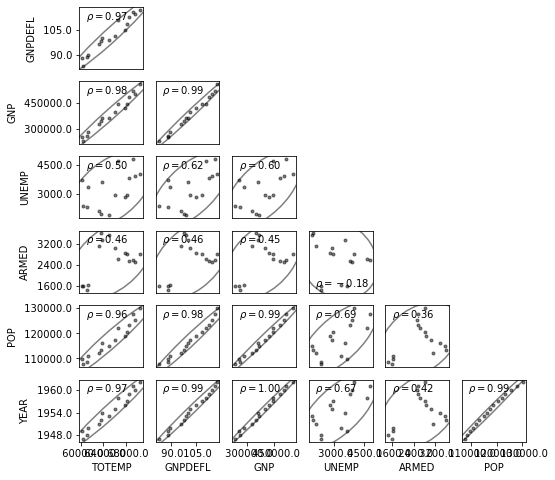

In [87]:
from statsmodels.graphics.plot_grids import scatter_ellipse
fig = plt.figure(figsize=(8,8))
scatter_ellipse(dta, varnames=dta.columns, fig=fig)
plt.show()


#### Influential points

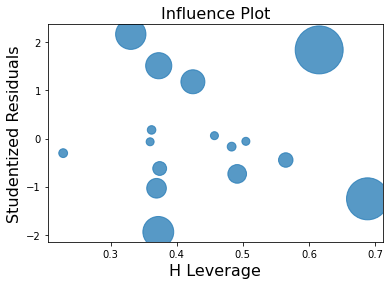

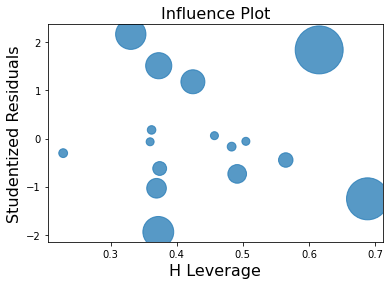

In [78]:
sm.graphics.influence_plot(results)

#### Interpreting parameter estimates

1. *A unit change in x1 will produce a change of b1 in the response* -> causality, hidden confounding variables, non-orthogonality 
1. *1 is the effect of x1 when all the other (specified) predictors are held constant* -> Often in practice, individual variables cannot be changed without changing others too -> We see that the significance and the direction of the effect of pop75 change according to what other variables are also included in the model. We see that no simple conclusion about the effect of pop75 is possible. We must find interpretations for a variety of models. We certainly won’t be able to make any
causal conclusions.

An alternative approach is recognize that the parameters and their estimates are fictional quantities in most regression situations. The “true” values may never be known (if they even exist in the first place). Instead concentrate on predicting future values - these may actually be observed and success can then be measured in terms of how good the predictions were. \
Prediction is more stable than parameter estimation. This enables a rather cautious interpretation of b1. Suppose the predicted value of y is ˆy for given x1 and for other given predictor values. Now suppose we observe x1+1 and the same other given predictor values then the predicted response is increased by b1. Notice that I have been careful to not to say that we have taken a specific individual and increased their x1 by 1, rather we have observed a new individual with predictor x1+1. To put it another way, people with yellow fingers tend to be smokers but making someone’s fingers yellow won’t make them more likely to smoke.

### Errors in predictors

The regression model Y Xb+e allows for Y being measured with error by having the e term, but what if the X is measured with error? In other words, what if the X we see is not the X used to generate Y? 

$ x_i = \xi_i + \delta_i = (realx)_i + (errx)_i$ 

So in general ˆb1 will be biased (regardless of the sample size and typically towards zero):

$$ E \hat\beta_1 \approx \beta_1 \frac{1}{1 + \sigma^2_{errx} / \sigma^2_{realx}}  $$

In other words, if the variability in the errors of observation of X are small relative to the range of X then we need not be concerned. If not, it’s a serious problem and other methods such as fitting using orthogonal rather than vertical distance in the least squares fit should be considered.

For prediction, measurement error in the x’s is not such a problem since the same error will apply to the
new x0 and the model used will be the right one.

For multiple predictors, the usual effect of measurement errors is to bias the ˆb in the direction of zero.

One should not confuse the errors in predictors with treating X as a random variable. For observational
data, X could be regarded as a random variable, but the regression inference proceeds conditional on a fixed
value for X. We make the assumption that the Y is generated conditional on the fixed value of X. Contrast
this with the errors in predictors case where the X we see is not the X that was used to generate the Y.

Exercise: 
```
x <- 10*runif(50)
y <- x+rnorm(50)
```

Fit a model and compare with 
```
x2 <- x + rnorm(50)
x3 <- x+5*rnorm(50)
```

Repeat this N times and find the mean $\hat\beta_1$ according to the equation above (we know both sigmas well)


### Missing variables

Intercept will act as a sink for the mean of the missing variable

### Residuals

We see that although the errors may have equal variance and be uncorrelated the residuals do not

Studentized residuals are sometimes preferred in residual plots as they have been standardized to have equal variance

#### Varying variance 

Weighted least squares is appropriate when the form of the non-constant variance is either known exactly or there is some known parametric form. -> suggests binning? 

Alternatively, one can transform y to h(y) where h is chosen so that var h(y) is constant.

How to choose h(y)?

1. Taylor-expand h(y) = h(Ey) + (y-Ey)h'(Ey) + ... 
1. calculate var h(y) following this expansion (keep 1. term) 
1. for var h(y) constant, there is a bound for h'(Ey), so it suggests: 

$$ h(y) = \int \frac{dy}{\sqrt{\textrm{var} y}} == \int \frac{dy}{{\textrm{SD} y}} $$ 

Example: 
- $var y \propto (Ey)^2$ -> $h(y)=\log(y)$
- $var y \propto (Ey)$ -> $h(y)=\sqrt{y}$

#### Non-linearity

Partial regression / Added variable: regress y on all-but-one (w/o x_i), get residuals; regress missing x_i on all-but-one, get other residuals; plot the 2 residuals against each other -> slope will be b_i, look for outliers, non-linearity etc. 

Partial residuals: get total residuals $\epsilon_i$, plot $\epsilon_i + \hat\beta_i x_i$ against $x_i$

Partial residual plots are reckoned to be better for non-linearity detection while added variable plots are better for outlier/influential detection

#### Distributions 

We can get an idea of the variation to be expected in QQ-plots in the following experiment. I generate
data from different distributions:
1. Normal
2. Lognormal - an example of a skewed distribution
3. Cauchy - an example of a long-tailed (platykurtic) distribution
4. Uniform - an example of a short-tailed (leptokurtic) distribution
Here’s how to generate 9 replicates at a time from each of these test cases:
```
> oldpar <- par()
> par(mfrow=c(3,3))
> for(i in 1:9) qqnorm(rnorm(50))
> for(i in 1:9) qqnorm(exp(rnorm(50)))
> for(i in 1:9) qqnorm(rcauchy(50))
> for(i in 1:9) qqnorm(runif(50))
> par(oldpar)
```

## Other
Error elipsoids: https://mathematica.stackexchange.com/questions/21396/how-to-use-a-3%c3%973-covariance-matrix-to-plot-an-error-ellipsoid/21417#21417 

# Statsmodel table

In [9]:
results.summary()

C:\Users\TK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           4.98e-10
Time:                        19:26:55   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.482e+06    8.9e+05     -3.911      0.004    -5.5e+06   -1.47e+06
GNPDEFL       15.0619     84.915      0.177      0.863    -177.029     207.153
GNP           -0.0358      0.033     -1.070      0.313      -0.112       0.040
UNEMP         -2.0202      0.488     -4.136      0.003      -3.125      -0.915
ARMED         -1.0332      0.214     -4.822      0.001      -1.518      -0.549
POP           -0.0511      0.226     -0.226      0.826      -0.563       0.460
YEAR        1829.1515    455.478      4.016      0.003     798.788    2859.515
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.684
Skew:                           0.420   Prob(JB):                        0.710
Kurtosis:                       2.434   Cond. No.                     4.86e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Omnibus: test for normality of residuals, based on skew (symmetry) and kurtosis (peakiness), combines the two tests quadratically. We want sth close to 0 
- Durbin-Watson: test for autocorrelation in the residuals, always 0..4. No autocorrelation = 2, positive <2, negative >2
- Jarque-Bera: similar to omnibus, but differently formulated. We want sth close to 0 
- condition number: takes into account high sensitivity in either fitted parameter to the input data, high c.n. = sensitive parameters 

 
- R2, Adj. R2 - residual sum of squares 
- AIC, BIC: Akaike / Bayesian Information Criterion - gof measures based on likelihood function
- F-test: how much better are current coefficients than null coefficients (base model - predict mean y)  


- p-value: how likely a  coefficient is measured through our model by chance

### Accessing statsmodel table elements: 

As a dataframe: use `model.summary2()`, `.tables` contains a list of 3 df

In [30]:
results.summary2().tables

C:\Users\TK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


[                     0                 1                    2         3
 0               Model:               OLS      Adj. R-squared:     0.992
 1  Dependent Variable:                 y                 AIC:  233.2349
 2                Date:  2021-10-25 19:45                 BIC:  238.6430
 3    No. Observations:                16      Log-Likelihood:   -109.62
 4            Df Model:                 6         F-statistic:     330.3
 5        Df Residuals:                 9  Prob (F-statistic):  4.98e-10
 6           R-squared:             0.995               Scale:    92936.,
               Coef.       Std.Err.         t     P>|t|        [0.025  \
 const -3.482259e+06  890420.383608 -3.910803  0.003560 -5.496529e+06   
 x1     1.506187e+01      84.914926  0.177376  0.863141 -1.770290e+02   
 x2    -3.581918e-02       0.033491 -1.069516  0.312681 -1.115811e-01   
 x3    -2.020230e+00       0.488400 -4.136427  0.002535 -3.125067e+00   
 x4    -1.033227e+00       0.214274 -4.821985  0.0

Important methods and properties of the model: 

In [ ]:
results.fittedvalues # fitted values 
results.resid # residuals 

In [39]:
results.predict([1,2,3,4,5,6,7]) # predict for a given vector

array([-3469438.11173679])

In [76]:
results.params # fitted parameters 
results.bse # std error on the coefficients
results.pvalues # chance that a coeff is not zero by chance

array([0.0035604 , 0.86314083, 0.31268106, 0.00253509, 0.00094437,
       0.8262118 , 0.0030368 ])

In [44]:
results.conf_int(alpha=0.05) # confidence intervals 

array([[-5.49652948e+06, -1.46798779e+06],
       [-1.77029035e+02,  2.07152780e+02],
       [-1.11581102e-01,  3.99427438e-02],
       [-3.12506664e+00, -9.15392966e-01],
       [-1.51794870e+00, -5.48505034e-01],
       [-5.62517214e-01,  4.60309003e-01],
       [ 7.98787515e+02,  2.85951541e+03]])

In [32]:
results.df_model # degrees of freedom of the model: how many coefficients (not incl. intercept)
results.df_resid # degrees of freedom - residual: number of points minus coefficients minus one

9.0

In [41]:
results.rsquared # R2. Watch out -> R2 is an imperfect measure of gof! 

0.9954790045772938

Other measures than R2: adjusted-R2, chi-square, MSE - see: 
- https://data.library.virginia.edu/is-r-squared-useless/ 
- https://statisticsbyjim.com/regression/r-squared-too-high/

"Endog" -> y, "exog" -> x \
see https://www.statsmodels.org/stable/endog_exog.html 